<a href="https://colab.research.google.com/github/Gokkulnath/EIP2/blob/master/Session_5_EIP_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/qubvel/classification_models

!pip install -q image-classifiers

#!wget https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet18_imagenet_1000.h5

# Dataset Preparation: 

In [2]:
import keras
from tensorflow.keras.datasets import cifar10
import numpy as np

from keras.preprocessing.image import  ImageDataGenerator
from classification_models.resnet import ResNet18, preprocess_input

# Training parameters
batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 10
data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=0,
    # randomly shift images horizontally
    width_shift_range=0.1,
    # randomly shift images vertically
    height_shift_range=0.1,
    # set range for random shear
    shear_range=0.,
    # set range for random zoom
    zoom_range=0.,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)





Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


# Model Creation and Fine Tuning

In [3]:
n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)


x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

# Freeze base_model
# for layer in base_model.layers:
#   layer.trainable=False


# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
        validation_data=(x_test, y_test),steps_per_epoch=len(x_train) // batch_size,
        epochs=epochs, verbose=1, workers=4)

    

W0712 08:24:53.928922 140064550057856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 08:24:53.964313 140064550057856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 08:24:53.966050 140064550057856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0712 08:24:53.970445 140064550057856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0712 08:24:53.972104 140064

Epoch 1/5
781/781 [==============================] - 67s 86ms/step - loss: 1.1398 - acc: 0.6078 - val_loss: 0.8627 - val_acc: 0.7056
Epoch 2/5
781/781 [==============================] - 63s 81ms/step - loss: 0.7931 - acc: 0.7229 - val_loss: 0.7244 - val_acc: 0.7493
Epoch 3/5
781/781 [==============================] - 63s 80ms/step - loss: 0.6827 - acc: 0.7613 - val_loss: 0.6307 - val_acc: 0.7827
Epoch 4/5
781/781 [==============================] - 63s 81ms/step - loss: 0.6209 - acc: 0.7812 - val_loss: 0.6083 - val_acc: 0.7866
Epoch 5/5
781/781 [==============================] - 63s 80ms/step - loss: 0.5696 - acc: 0.8000 - val_loss: 0.5617 - val_acc: 0.8049


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [7]:
print('Number of Keras Layers',len(model.layers))
model.layers[-10:]

Number of Keras Layers 88


In [8]:
model.layers[-6]

# Generating Predictions:

In [0]:
predict = model.predict(x_test)



In [0]:
preds = [np.argmax(x, axis=-1) for x in predict]
labels = [np.argmax(x, axis=-1) for x in y_test]
miclassified_idx = [i for i, x in enumerate(preds) if preds[i]!=labels[i]]

In [58]:
fault = random.sample([i for i in range(len(miclassified_idx))],2)
fault

np.random.choice(miclassified_idx, 5)

array([2624, 7906, 9190, 3901, 8376])

# HeatMap Generation

-  Reference : [Link]( http://www.hackevolve.com/where-cnn-is-looking-grad-cam/)
- i.e  http://www.hackevolve.com/where-cnn-is-looking-grad-cam/

In [0]:
cifar_classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
    ]

In [0]:
import random
%matplotlib inline
from google.colab.patches import cv2_imshow


from keras import backend as k
from PIL import Image
from numpy import zeros, newaxis
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt



def plot_images(num_rows, num_cols):
#   fault = random.sample([i for i in range(len(miclassified_idx))], num_rows*num_cols)
  miclassified_samples= np.random.choice(miclassified_idx,num_rows*num_cols)
  f, axarr = plt.subplots(num_rows, num_cols*2,figsize=(12,8))
  
  for v, i in enumerate(miclassified_samples):
    class_idx =preds[i] # Predicted Output
    last_conv_layer = model.layers[-6]
    actual=labels[i]    
    img = x_test[i]
    img = img.copy()
    x = [img]

    class_output = model.output[:, class_idx]
   
    
    # Code Copied and Modified from the reference Page
    grads = k.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = k.mean(grads, axis=(0, 1, 2))
    iterate = k.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    img = cv2.resize(img, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    img = np.uint8(255 * img)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    
    # Plot
    axarr[int(v/num_cols),2*(v%num_cols)].imshow(img)
    axarr[int(v/num_cols),2*(v%num_cols)].title.set_text(' Actual :{} Predicted: {}'.format(actual,class_idx))
    axarr[int(v/num_cols),2*(v%num_cols)+1].imshow(superimposed_img)
    axarr[int(v/num_cols),2*(v%num_cols)+1].title.set_text(' Actual :{} Predicted: {}'.format(cifar_classes[actual],cifar_classes[class_idx]))


In [0]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


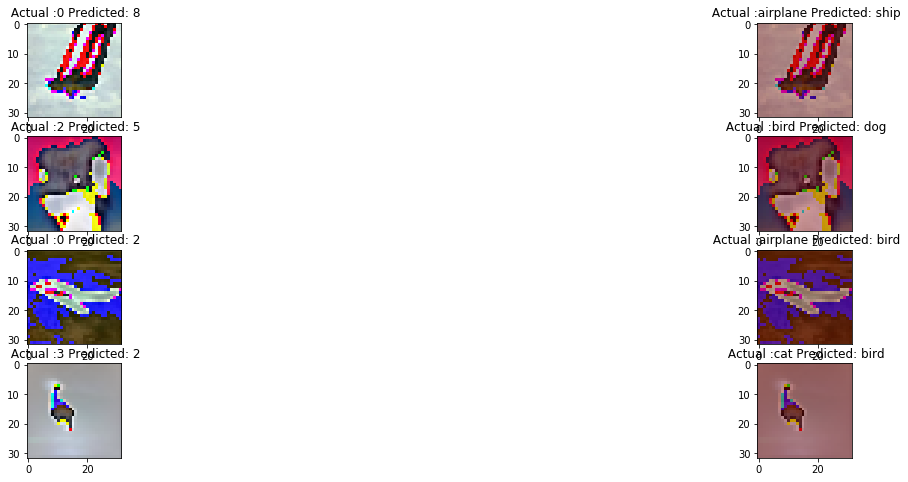

In [81]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


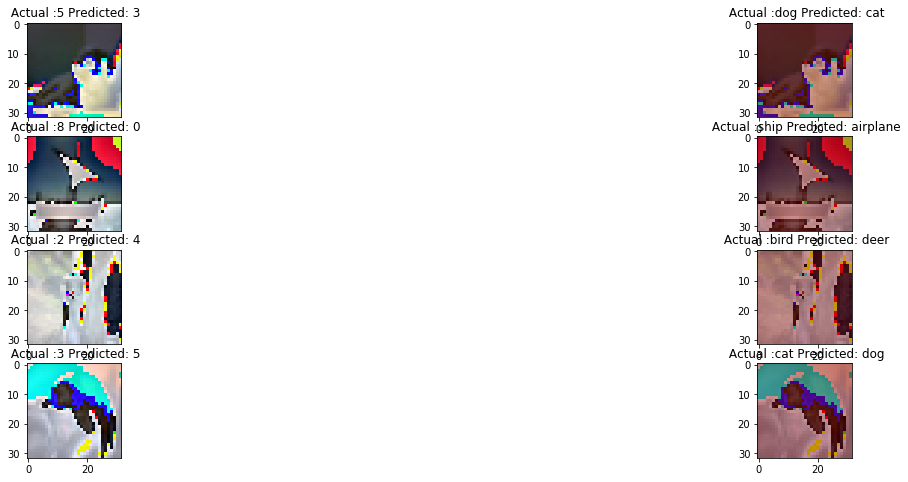

In [82]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


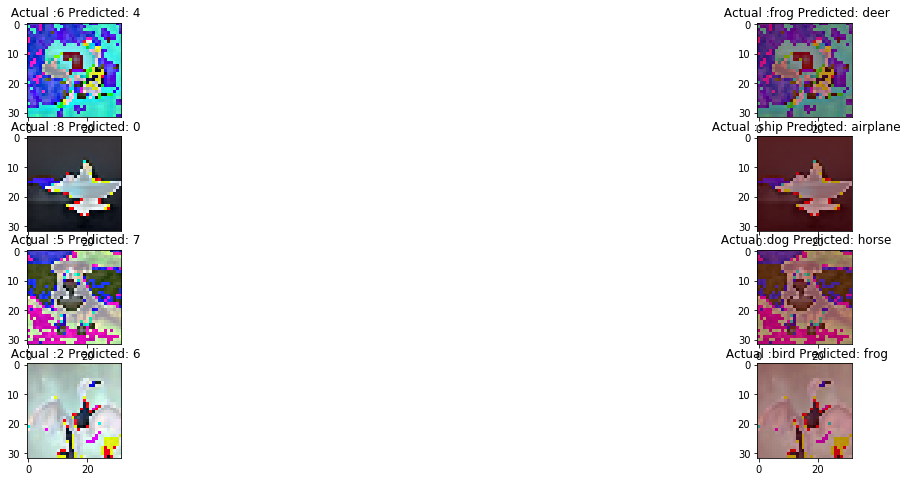

In [83]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


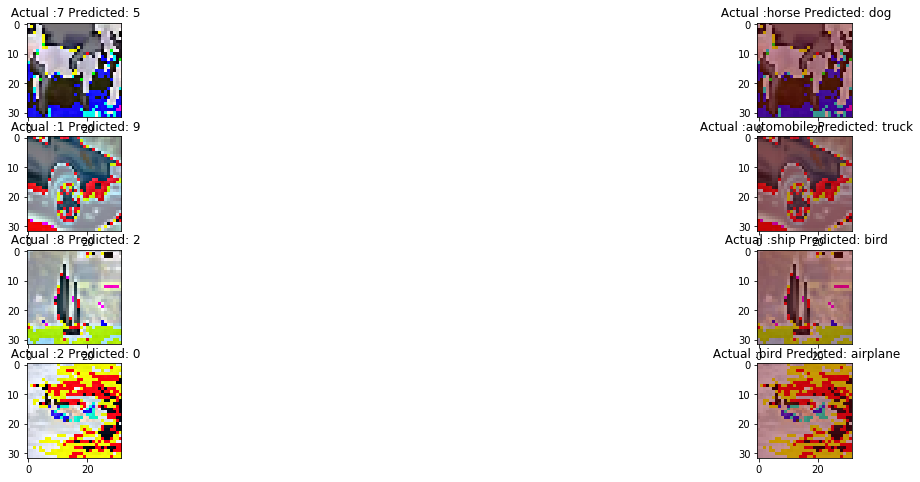

In [84]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


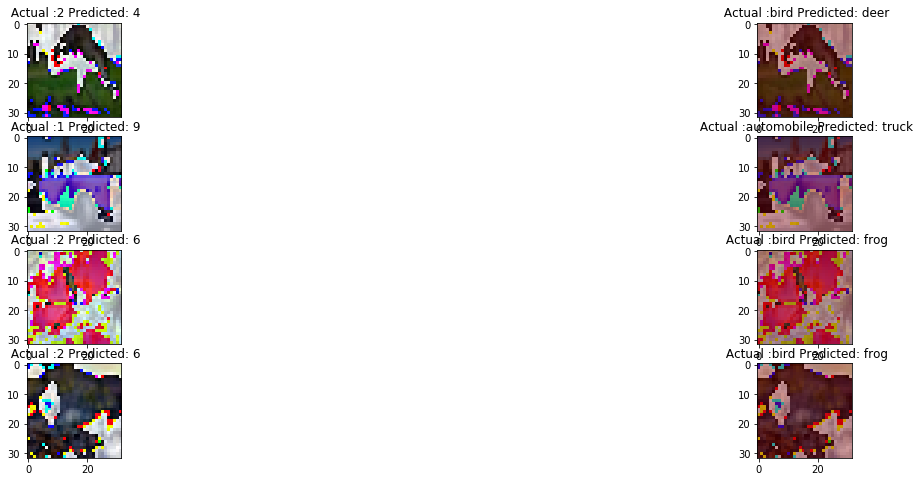

In [85]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


In [0]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)


In [0]:
plot_images(4, 1)
